# LendingClub Loan Prediction - Model Insights & Conclusions
## Author: Congjun Huang

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz
import pydotplus
from IPython.display import Image 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read best model pickle
with open('best_model.pickle', 'rb') as file:
    best_model = pickle.load(file)

In [3]:
# get training and test data
X_train = pd.read_csv('X_train.csv')
X_train.index = X_train['Unnamed: 0']
X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_train.index.name = ''

y_train = pd.read_csv('y_train.csv')
y_train.index = y_train['Unnamed: 0']
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_train.index.name = ''

X_test = pd.read_csv('X_test.csv')
X_test.index = X_test['Unnamed: 0']
X_test = X_test.drop(['Unnamed: 0'], axis=1)
X_test.index.name = ''

y_test = pd.read_csv('y_test.csv')
y_test.index = y_test['Unnamed: 0']
y_test = y_test.drop(['Unnamed: 0'], axis=1)
y_test.index.name = ''

In [4]:
# retrain best model on training data
final_model = best_model.fit(X_train, y_train)

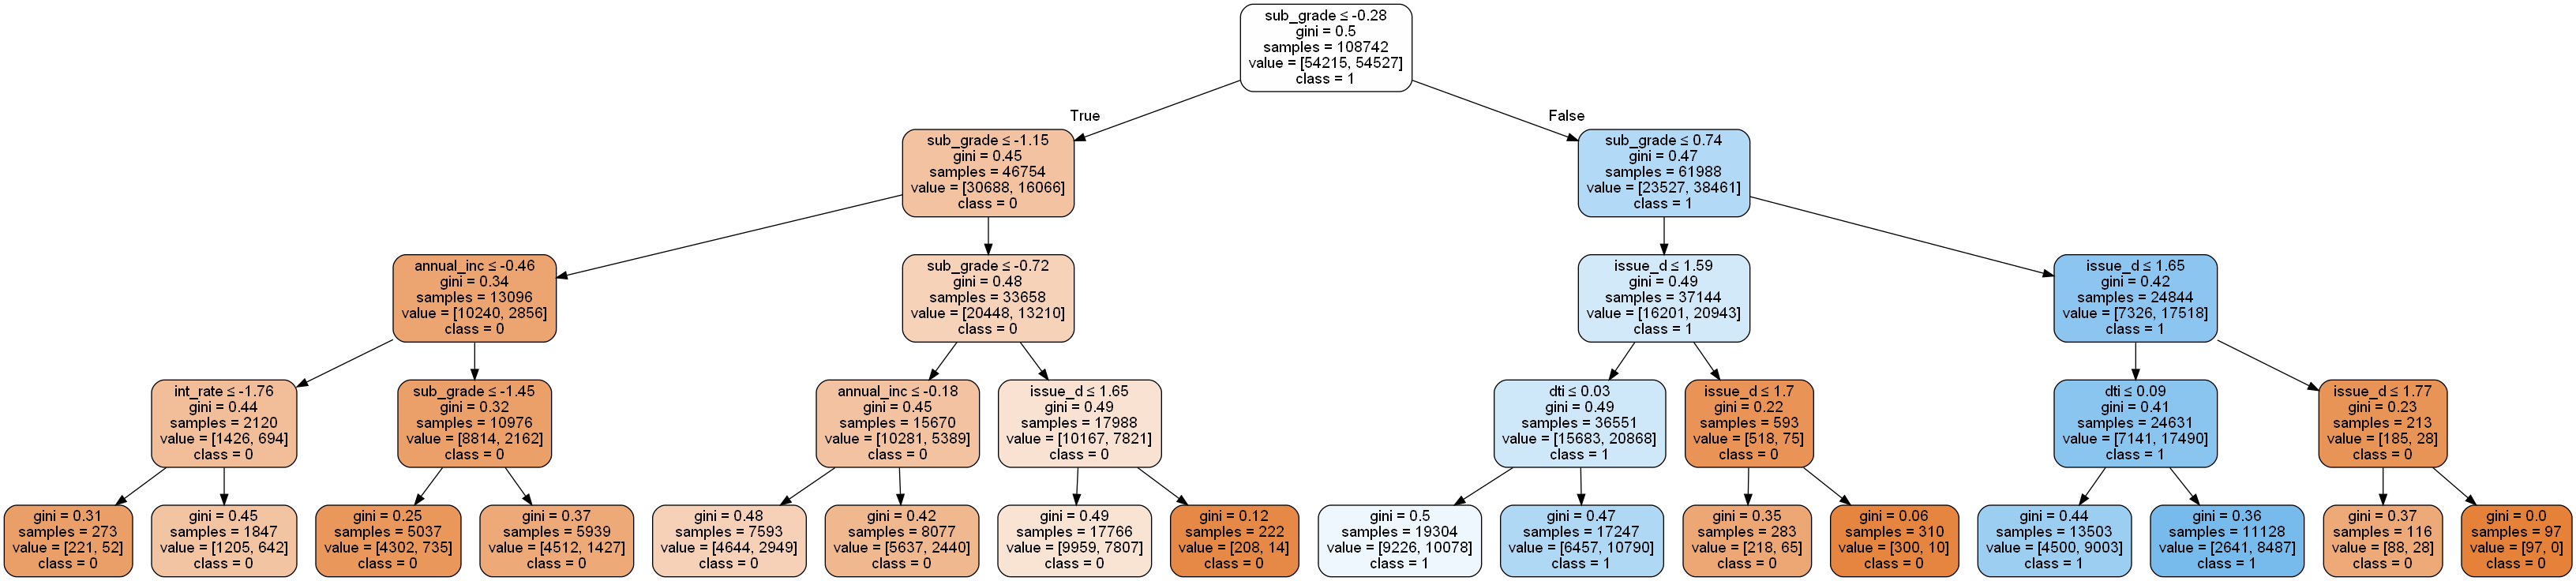

In [15]:
# visualize simple decision tree classifier
dt = DecisionTreeClassifier(max_depth=4, random_state=123).fit(X_train, y_train)
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=X_train.columns,
                                class_names=['0','1'],
                                filled=True, rounded=True,
                                special_characters=True,
                                precision=2)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

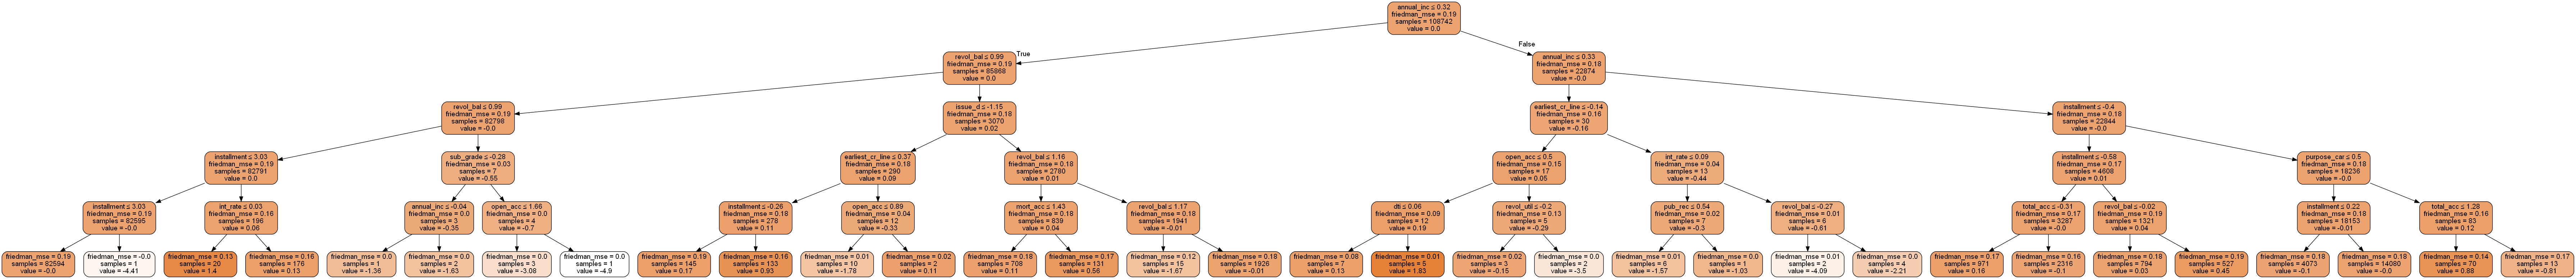

In [13]:
# visualize final model gradient boosting classifier
sub_tree = final_model.estimators_[1199,0]
dot_data = tree.export_graphviz(sub_tree, out_file=None,
                                feature_names=X_train.columns,
                                class_names=['0','1'],
                                filled=True, rounded=True,
                                special_characters=True,
                                precision=2)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [34]:
# perform feature importance analysis
def feature_importance_analysis(model, feat_names, nums):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        ranked_feats.append(feat_names[indices[i]])
    ranking = pd.DataFrame()
    ranking['Feature Index'] = indices
    ranking['Feature Name'] = ranked_feats
    ranking['Feature Importance'] = np.sort(importances)[::-1]
    display(ranking.iloc[:nums,:])
    
    ax = ranking[:nums][::-1].plot(x='Feature Name', y='Feature Importance', kind='barh', figsize=(12,7), legend=False)
    ax.set_xlabel('Feature Importance', fontsize=12)
    plt.show()
    
    return

,Feature Index,Feature Name,Feature Importance
0,31,sub_grade,0.428965
1,34,issue_d,0.117636
2,33,annual_inc,0.066653
3,35,dti,0.064403
4,30,installment,0.037474
5,39,revol_bal,0.036707
6,40,revol_util,0.032705
7,28,term,0.030821
8,36,earliest_cr_line,0.030139
9,27,loan_amnt,0.023790


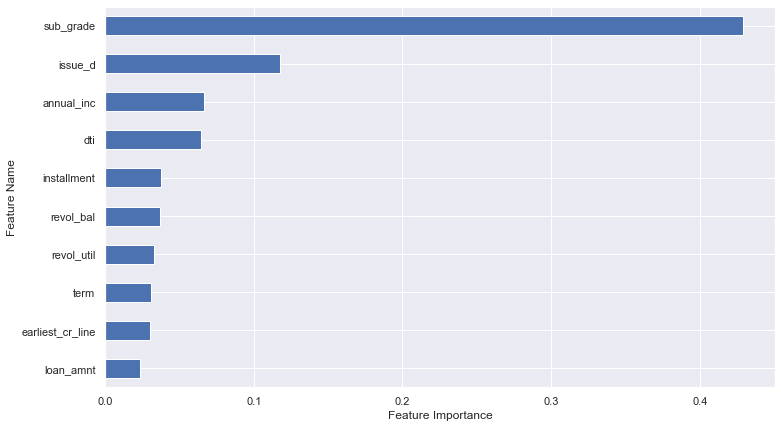

In [35]:
# find top 10 important features
feature_importance_analysis(final_model, X_train.columns, 10)

## Discussions & Conclusions

The final machine learning model selected for LendingClub loan prediction is `GradientBoostingClassifier(learning_rate=0.029, max_depth=5, n_estimators=1200)`, with AUC 0.735 and AP 0.712 on test data. The Gradient Boosting Classifier is a very robust algorithm combining both gradient descent and boosting, which has three main components: additive model, loss function and weak learner.  

The top 10 important features are: `sub_grade` (0.429) > `issue_d` (0.118) > `annual_inc` (0.067) > `dti` (0.064) > `installment` (0.037) > `revol_bal` (0.036) > `revol_util` (0.033) > `term` (0.031) > `earliest_cr_line` (0.030) > `loan_amnt` (0.024). LendingClub can take these factors into greater consideration when assessing a new loan.

In the future work, additional features can be added and more default (charged off) cases can be collected into the entire dataset. An increasing amount of energy can be put into sample selection, feature engineering and dimensionality reduction.

The final model of this project can serve as a loan prediction tool for LendingClub, and help the company to focus on the most crucial factors in the process of loan prediction.